In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#from geopy.distance import vincenty
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
from scipy.spatial.distance import cdist, pdist
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#from mpl_toolkits.basemap import Basemap
import copy
import json
import math
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## ground floor before covid19

In [15]:
df_before = pd.read_csv("/Users/ruichao/Desktop/datapart2/78.txt")
df_before.columns = ['building', 'location', 'macaddress','latitude','longitude','date','time']

In [16]:
df_before = df_before[(df_before['time'] > "06:00:00") & (df_before['time'] < "22:00:00")]

In [17]:
df_before['macaddress'].value_counts(ascending=False)

a4:c3:f0:a1:fb:b7    16997
90:61:ae:25:4f:7c    16057
9c:da:3e:7f:8e:ab    15379
a4:c3:f0:a1:fa:b3    15360
54:99:63:cd:7d:c7    15290
                     ...  
80:58:f8:c9:7b:09        3
80:58:f8:38:ea:9c        3
80:58:f8:c1:4f:82        3
80:58:f8:e3:5e:d9        3
80:58:f8:62:93:0e        3
Name: macaddress, Length: 9086, dtype: int64

In [18]:
df_before['date'].value_counts(ascending=False)

2019-10-23    365071
2019-10-24    320343
2019-10-22    281967
2019-10-21    208597
2019-10-28    152055
2019-10-25    126074
2019-10-19      8063
2019-10-26      4900
2019-10-20      4623
2019-10-18      3966
2019-10-27      2204
Name: date, dtype: int64

In [25]:
df_one_day = df_before[df_before['date'] == '2019-10-23']

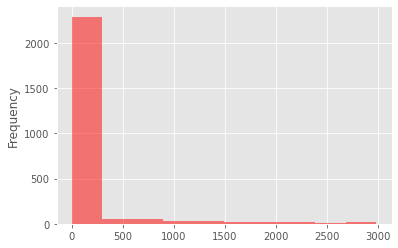

In [26]:
series = df_one_day['macaddress'].value_counts(ascending=False)
list_ = series.to_list()
p = series.plot(kind='hist', color='r', alpha=0.5)

## average daily count of macaddress before covid 19

In [21]:
avg_count_before = sum(df_before['date'].value_counts(ascending=False))/len(df_before['date'].value_counts(ascending=False))
avg_count_before

134351.18181818182

## ground floor after covid19

In [22]:
df_after = pd.read_csv("/Users/ruichao/Desktop/datapart2/64.txt")
df_after.columns = ['building', 'location', 'macaddress','latitude','longitude','date','time']
df_after = df_after[(df_after['time'] > "06:00:00") & (df_after['time'] < "22:00:00")]
df_after['macaddress'].value_counts(ascending=False)
df_after['date'].value_counts(ascending=False)


2020-05-27    27907
2020-05-20    26529
2020-06-04    23605
2020-05-26    21600
2020-05-28    19587
2020-06-02    14206
2020-05-19    13979
2020-06-01    13931
2020-05-21    12672
2020-05-22    11034
2020-06-03    10666
2020-06-05    10420
2020-05-18     9831
2020-05-29     7808
2020-05-23     3514
2020-05-24     3396
2020-05-25     3042
2020-06-07      773
2020-05-17      689
2020-06-06      671
2020-05-31      572
2020-05-30      294
Name: date, dtype: int64

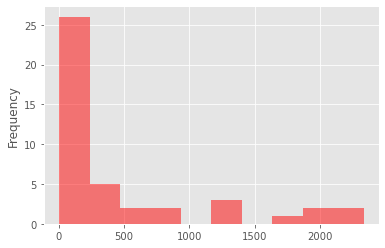

In [23]:
df_oneday2 = df_after[df_after['date'] == '2020-05-28']
series2 = df_oneday2['macaddress'].value_counts(ascending=False)
list_2 = series2.to_list()
p = series2.plot(kind='hist', color='r', alpha=0.5)

## average daily count of macaddress after covid 19

In [24]:
avg_count_after = sum(df_after['date'].value_counts(ascending=False))/len(df_after['date'].value_counts(ascending=False))
avg_count_after

10760.272727272728